In [1]:
import pandas as pd
import random
import os
from stegimage import encoder, decoder
from PIL import Image
import csv

In [31]:
name = "validation"

# Path to the folder containing the images
folder_path = f'../data/raw/{name}/'

# Get the list of image file names in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]

# remove images that are not RGB
for file in image_files:
    im = Image.open(folder_path + file)
    
    if im.mode != "RGB":
        image_files.remove(file)

# Randomly shuffle the image file names
random.shuffle(image_files)

# Split the image file names into train and test sets
split_ratio = 0.5
train_size = int(len(image_files) * split_ratio)
encrypted_images = image_files[:train_size]
non_encrypted_images = image_files[train_size:]

In [32]:
save_path = f'../data/processed/{name}/'

with open(f"../data/processed/labels/{name}_labels.csv", 'w') as f:
    writer = csv.writer(f)

    for file in encrypted_images:
        im = Image.open(folder_path + file)
        eim, key = encoder.encode_stencil("hello", img=im, text_size=70, text_coords=(100, 100))
        new_name = file[:-4] + "png"
        eim.save(save_path + new_name)
        
        writer.writerow([new_name, 1])

    for file in non_encrypted_images:
        im = Image.open(folder_path + file)
        new_name = file[:-4] + "png"
        im.save(save_path + new_name)

        writer.writerow([new_name, 0])

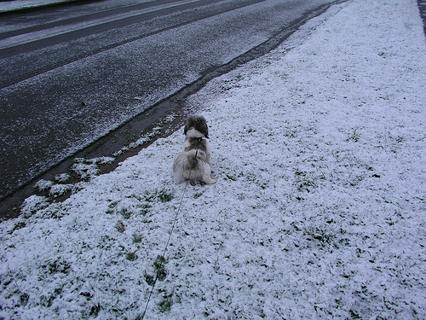

In [25]:
im = Image.open(folder_path + image_files[0])

eim, key = encoder.encode_stencil("hello", img=im, text_size=70, text_coords=(100, 100))
eim

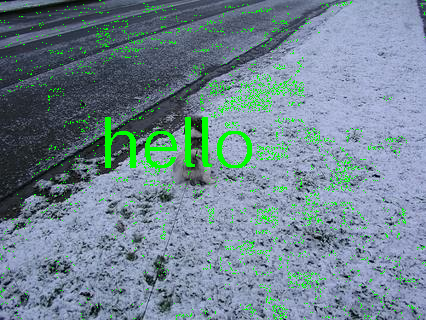

In [26]:
decoder.decode_stencil(key, img=eim)